Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

Objective: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.


Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("archive/amz_uk_price_prediction_dataset.csv")

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
df.shape

(2443651, 9)

In [5]:
# df.isnull().sum()

In [6]:
# df.dtypes

Part 1: Understanding Product Categories

Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. Frequency Tables:

    - Generate a frequency table for the product category.
    - Which are the top 5 most listed product categories?

2. Visualizations:

    - Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [7]:
# 1
df["category"].value_counts()[:5]

#or

freq_table = pd.crosstab(index=df["category"], columns="count").sort_values(by="count", ascending=False)
top_5_freq_table=freq_table[:5]

top_5_freq_table

col_0,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


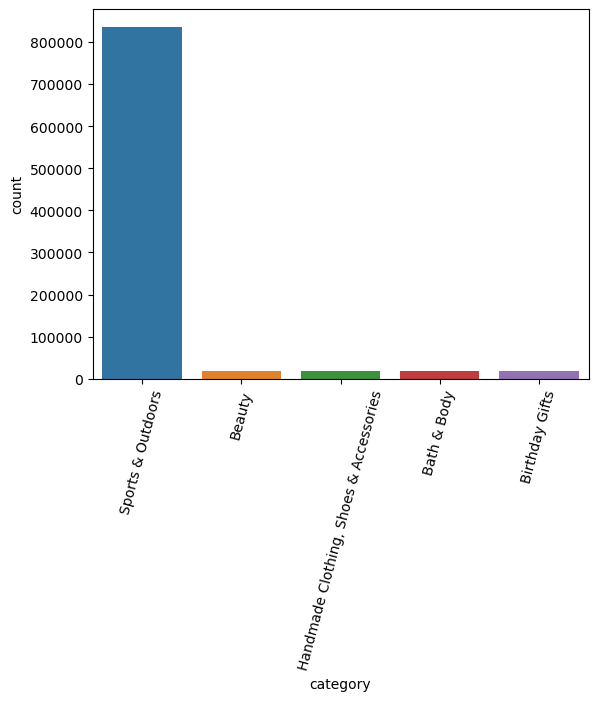

In [8]:
# 2.
sns.barplot(x=top_5_freq_table.index, y= top_5_freq_table["count"])
plt.xticks(rotation=75)
plt.show()

array([<Axes: ylabel='count'>], dtype=object)

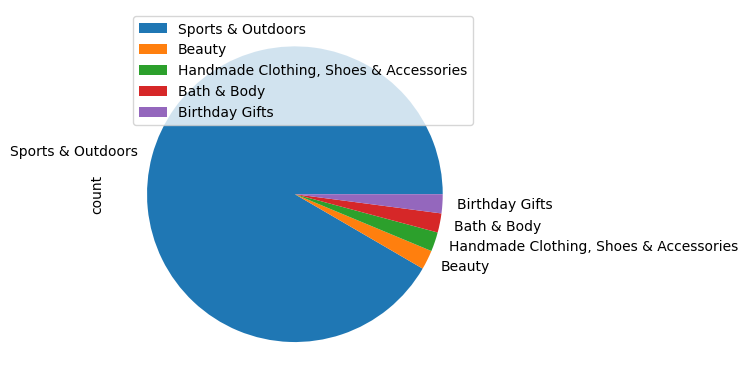

In [9]:
top_5_freq_table.plot.pie(subplots=True)
# top_5_freq_table.plot.pie(y="count")

Part 2: Delving into Product Pricing

Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. Measures of Centrality:

    - Calculate the mean, median, and mode for the price of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. Measures of Dispersion:

    - Determine the variance, standard deviation, range, and interquartile range for product price.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. Visualizations:

    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [10]:
# 1. measures of centrality

mean_price = df["price"].mean()
median_price = df["price"].median()
mode_price = df["price"].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

In [11]:
# average price >> median > mode - means that the distribution is positively skewed

In [12]:
# 2. 
# df["price"].describe() #already gives us some of those values

In [13]:
# variance
price_var = df["price"].var()

# standard deviation
price_std = df["price"].std()

# minimum
price_min = df["price"].min()

# maximum
price_max = df["price"].max()

# IQR
price_iqr = df["price"].quantile(0.75)-df["price"].quantile(0.25)

price_var, price_std, price_min, price_max, price_iqr


(119445.48532256528, 345.60886175352226, 0.0, 100000.0, 36.0)

In [14]:
# yes, the prices are varied, the std is quite high. However, according to the IQR, half of the items are priced in an interval of 36 pounds.

c:\Users\ruijr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

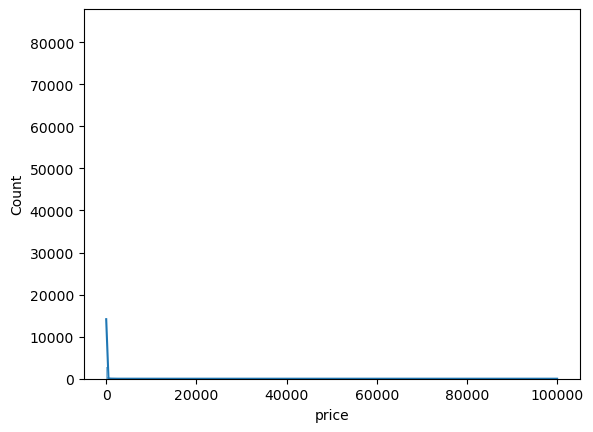

In [15]:
# 3.
sns.histplot(df["price"], kde = True)

In [16]:
pd.qcut(df["price"], q=4, labels =["Low", "Medium", "High", "Very High"], retbins=True)
# this way we placed the items in 4 bins with approximately the same size of items, not the same range of price value. This way we see that 75% of the products cost less than 46 pounds.

(0               High
 1               High
 2               High
 3               High
 4             Medium
              ...    
 2443646         High
 2443647    Very High
 2443648    Very High
 2443649    Very High
 2443650    Very High
 Name: price, Length: 2443651, dtype: category
 Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High'],
 array([0.000e+00, 9.990e+00, 1.909e+01, 4.599e+01, 1.000e+05]))

In [17]:
pd.qcut(df["price"], q=4, labels =["Low", "Medium", "High", "Very High"]).value_counts()

price
Low          629239
High         612341
Very High    609043
Medium       593028
Name: count, dtype: int64

c:\Users\ruijr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 46.0)

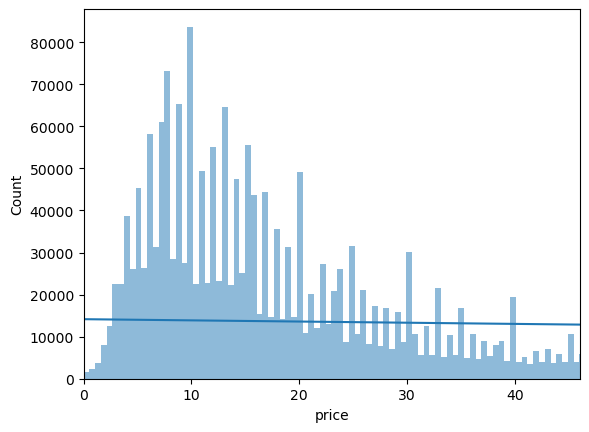

In [18]:
sns.histplot(df["price"], kde = True).set_xlim(0,46)
#knowing what we verified, we can limit the x-axis to see 75% of items

<Axes: >

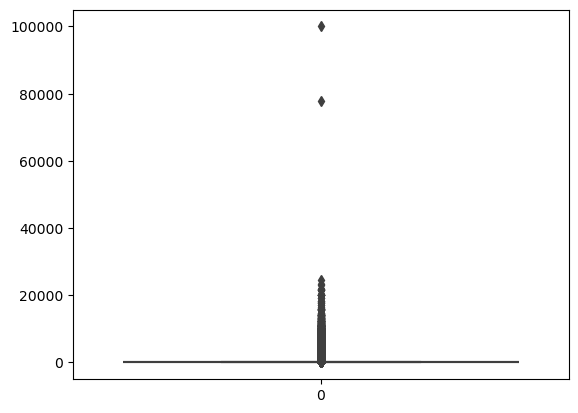

In [19]:
sns.boxplot(data = df["price"])
# we see that we have several outliers

<Axes: >

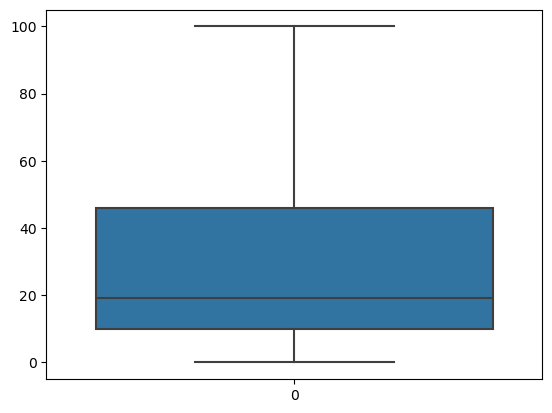

In [20]:
sns.boxplot(data = df["price"], showfliers=False)
# extra: removing the outliers we can confirm what we measured previously, and see easily that 75% of items cost less than 46 pounds.